### import library yang dibutuhkan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams, cycler

In [2]:
# Menggunakan style ggplot
plt.style.use('ggplot')

In [3]:
df = pd.read_csv("master.csv")

In [4]:
print("Ukuran dataset:", df.shape)

Ukuran dataset: (27820, 12)


In [4]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


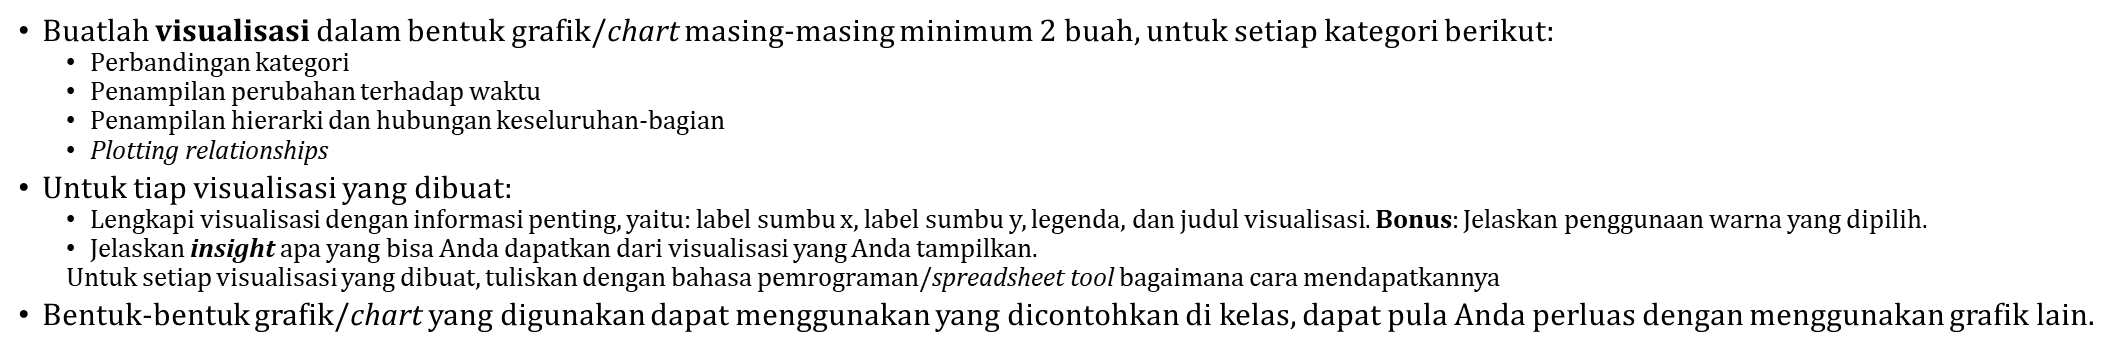

In [6]:
# Parameter global awal untuk seluruh visualisasi
rcParams['figure.figsize'] = 12, 6
rcParams['lines.linewidth'] = 2.5
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'
rcParams['axes.labelsize'] = 'xx-large'
rcParams['axes.titlesize'] = 'xx-large'
rcParams['legend.fontsize'] = 'large'

# Visualisasi Data

## Perbandingan Kategori

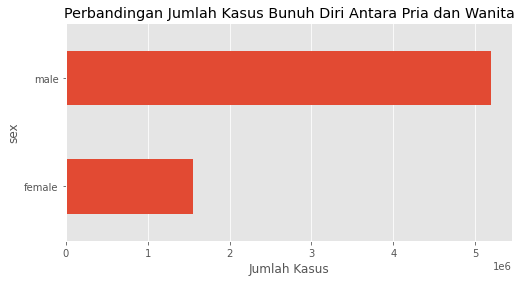

In [5]:
title = 'Perbandingan Jumlah Kasus Bunuh Diri Antara Pria dan Wanita'
df.groupby('sex').sum()['suicides_no'].plot(kind='barh', figsize=(8, 4), title=title)
plt.gca().yaxis.grid(False)
plt.xlabel('Jumlah Kasus')
plt.show()

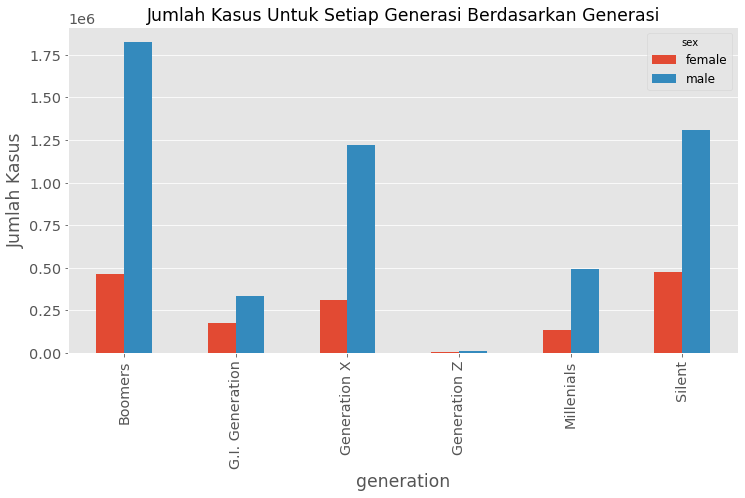

In [8]:
title = 'Jumlah Kasus Untuk Setiap Generasi Berdasarkan Generasi'
ax = df.groupby(['generation', 'sex']).sum().unstack()['suicides_no'].plot(kind='bar', figsize=(12, 6), title=title)
ax.grid(axis='x')
ax.set_ylabel('Jumlah Kasus')
plt.show()

In [9]:
age_dict = {'5-14 years':0, '15-24 years': 1, '25-34 years': 2, 
            '35-54 years': 3, '55-74 years': 4, '75+ years': 5}

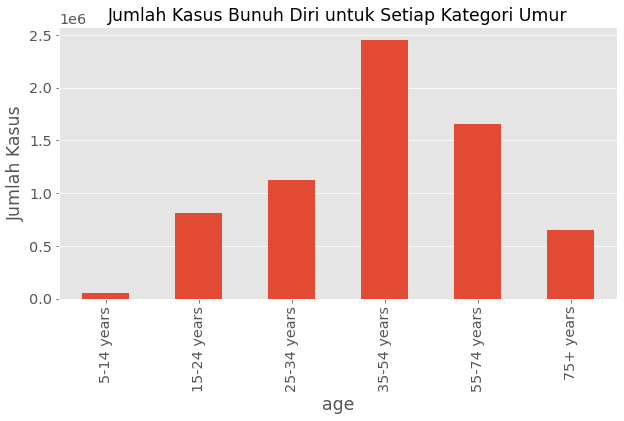

In [10]:
title = 'Jumlah Kasus Bunuh Diri untuk Setiap Kategori Umur'
df.groupby('age').sum()['suicides_no'].sort_index(key=lambda x: x.map(age_dict))\
    .plot(kind='bar', figsize=(10, 5), title=title, ylabel='Jumlah Kasus')
plt.grid(axis='x')
plt.show()

## Data Terhadap Waktu

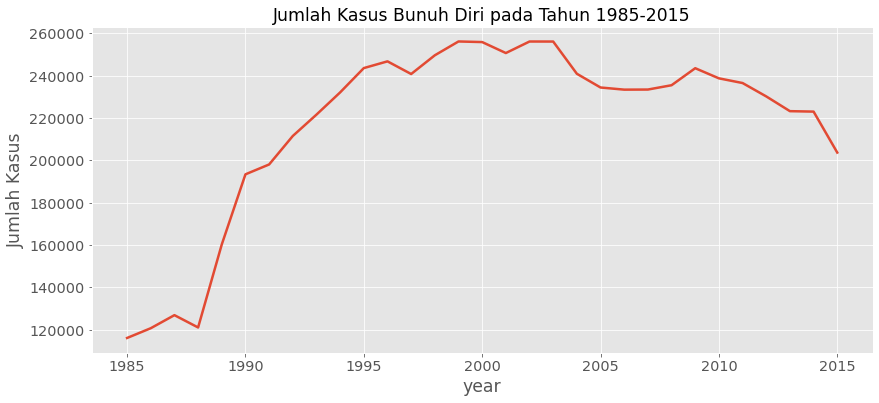

In [11]:
df[df['year'] < 2016].groupby('year').sum()['suicides_no'].plot(kind='line', figsize=(14, 6), ylabel='Jumlah Kasus')
plt.title("Jumlah Kasus Bunuh Diri pada Tahun 1985-2015")
plt.show()

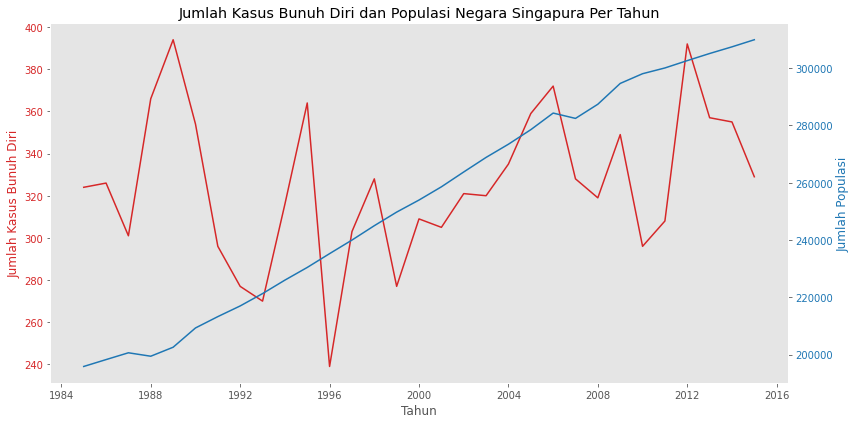

In [6]:
ax_data = df[df['country'] == 'Singapore'].groupby('year')
ax1_values = ax_data.sum()['suicides_no']
ax2_values = ax_data.mean()['population']

fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.set_title("Jumlah Kasus Bunuh Diri dan Populasi Negara Singapura Per Tahun")

color = 'tab:red'
ax1.set_xlabel('Tahun')
ax1.set_ylabel('Jumlah Kasus Bunuh Diri', color=color)
ax1.grid(None)

ax1.plot(pd.to_datetime(ax_data.count().index, format='%Y'), ax1_values, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('Jumlah Populasi', color=color) 
ax2.plot(pd.to_datetime(ax_data.count().index, format='%Y'), ax2_values, color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.grid(None)

fig.tight_layout()
plt.show()

## Penampilan hierarki dan hubungan keseluruhan-bagian

### Banyaknya data umur

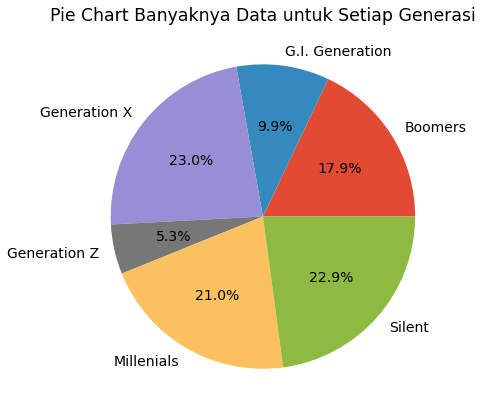

In [13]:
df.groupby('generation').count().plot(kind='pie', y='year', autopct='%1.1f%%', 
                                      legend=False, textprops={'fontsize': 14},
                                      title='Pie Chart Banyaknya Data untuk Setiap Generasi',
                                      figsize=(7, 7))
plt.ylabel(None)
plt.show()

In [14]:
smaller_age_group = {'5-14 years': '5-24 years','15-24 years': '5-24 years', '25-34 years': '25-54 years',
                     '35-54 years': '25-54 years', '55-74 years': '55+ years','75+ years': '55+ years'}
smaller_age_dict = {'5-24 years': 0, '25-54 years': 1, '55+ years': 2}

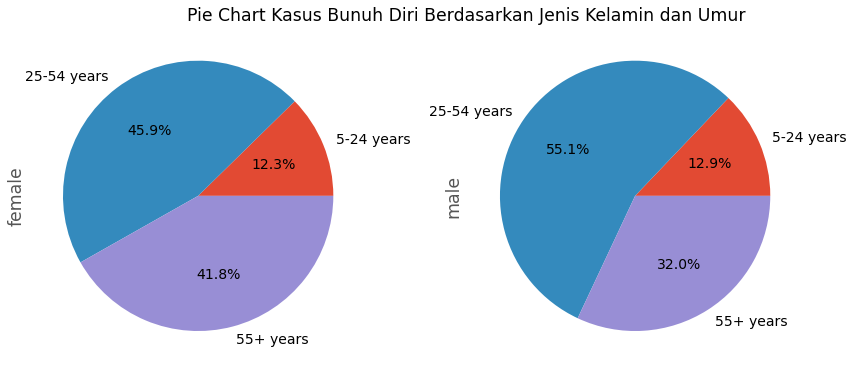

In [15]:
age_df = df[['age', 'sex', 'suicides_no']].copy()
age_df['age'] = age_df['age'].map(smaller_age_group)


age_df.groupby(['age', 'sex']).sum()['suicides_no'].unstack().sort_index(key=lambda x: x.map(smaller_age_dict))\
    .plot(kind='pie', subplots=True, legend=False, autopct='%1.1f%%', textprops={'fontsize': 14})
plt.title('Pie Chart Kasus Bunuh Diri Berdasarkan Jenis Kelamin dan Umur', x=0)
plt.tight_layout()
plt.show()

## Plotting Relationships (Korelasi)

### Hubungan antara jumlah populasi dengan jumlah kasus bunuh diri pada tahun 2015

In [16]:
# Bubble plot untuk menunjukkan korelasi jumlah kasus, populasi, dan GDP pada tahun 2015
# serta populasi < 100 juta (karena ada beberapa negara yang mempunyai populasi sangat tinggi seperti Amerika Serikat)
grouped_df = df[df['year'] == 2015].groupby('country').sum()
grouped_df = grouped_df[grouped_df['population'] < 1e8]

In [17]:
corr = grouped_df['suicides_no'].corr(grouped_df['population'])
print("Nilai korelasi antara jumlah kasus dengan jumlah populasi suatu negara adalah", corr)

Nilai korelasi antara jumlah kasus dengan jumlah populasi suatu negara adalah 0.7301890286788706


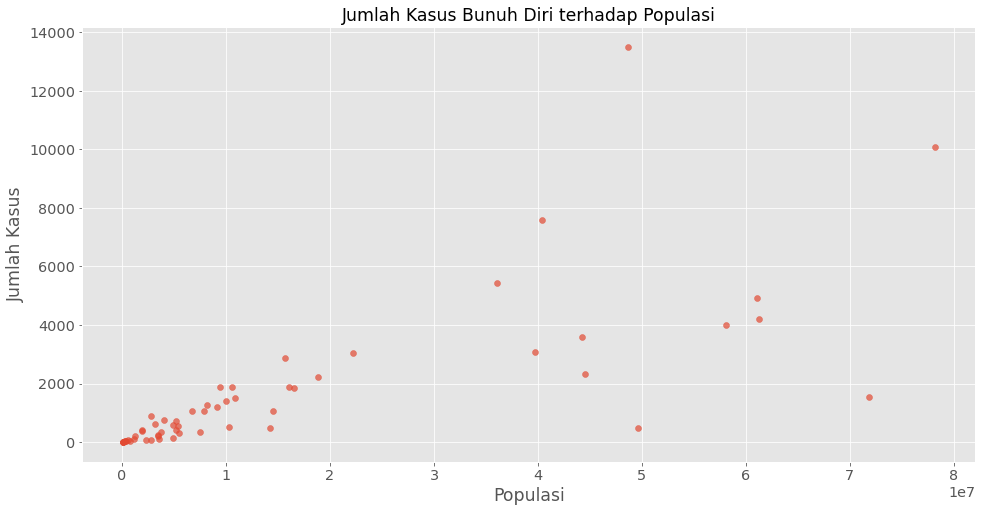

In [18]:
plt.figure(figsize=(16, 8))
plt.scatter(grouped_df['population'], grouped_df['suicides_no'], alpha=0.7)
plt.xlabel('Populasi')
plt.ylabel('Jumlah Kasus')
plt.title('Jumlah Kasus Bunuh Diri terhadap Populasi')
plt.show()

Jumlah populasi berkorelasi cukup kuat dengan jumlah kasus bunuh diri (0.73). Namun, PDB Per Kapita tidak mempunyai korelasi dengan populasi dan jumlah kasus.

### Korelasi antara jumlah populasi, jumlah kasus bunuh diri, dan GDP pada tahun 2010

In [19]:
average = df[df['year'] == 2010].groupby('country').mean()
total = df[df['year'] == 2010].groupby('country').sum()

In [20]:
pd.concat([total['suicides/100k pop'], average['HDI for year'], average['gdp_per_capita ($)']], axis=1).corr()

,suicides/100k pop,HDI for year,gdp_per_capita ($)
suicides/100k pop,1.000000,0.214648,0.025264
HDI for year,0.214648,1.000000,0.799190
gdp_per_capita ($),0.025264,0.799190,1.000000


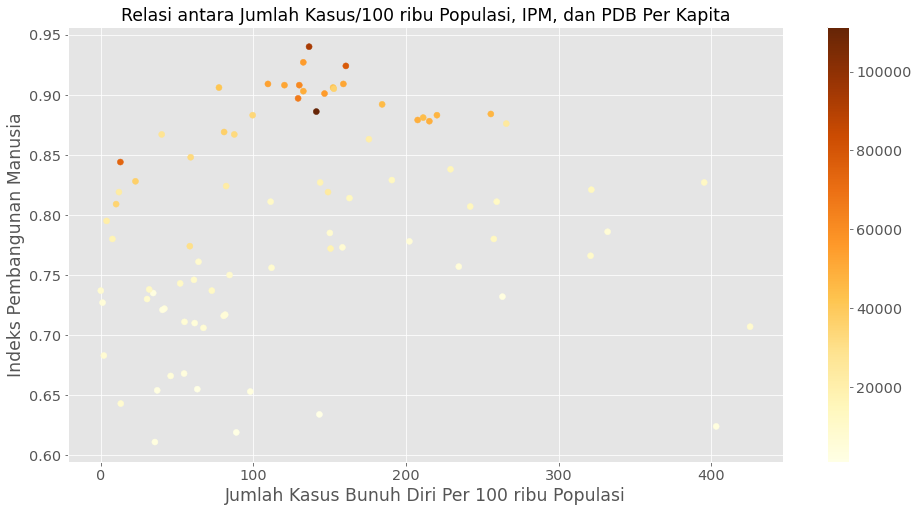

In [21]:
plt.figure(figsize=(16, 8))
plot = plt.scatter(x=total['suicides/100k pop'], y=average['HDI for year'], c=average['gdp_per_capita ($)'],
                  cmap='YlOrBr')
plt.title('Relasi antara Jumlah Kasus/100 ribu Populasi, IPM, dan PDB Per Kapita')
plt.xlabel('Jumlah Kasus Bunuh Diri Per 100 ribu Populasi')
plt.ylabel('Indeks Pembangunan Manusia')

plt.colorbar()

plt.show()

Relasi di sini adalah semakin tinggi indeks pembangunan manusia (IPM) suatu negara, semakin tinggi pula PDB per kapitanya (koefisien korelasi: 0.80). Sedangkan, jumlah kasus bunuh diri per 100 ribu tidak terlalu terpengaruh IPM (korelasi: 0.21) maupun PDB (korelasi: 0.02).

# Korelasi Data Numerik

In [22]:
import seaborn as sns

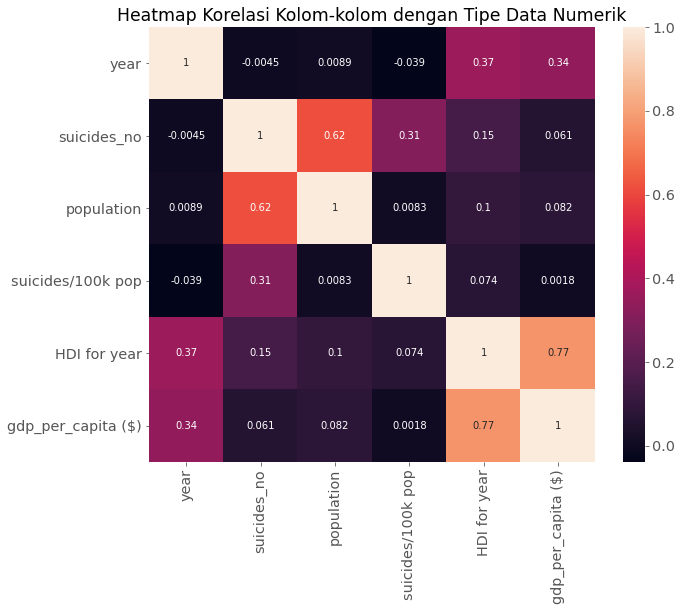

In [23]:
corr_df = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_df, annot=True)
plt.title("Heatmap Korelasi Kolom-kolom dengan Tipe Data Numerik")

plt.show()